# For the Lovely Brigette
This notebook does all of your `XSPEC` commands in Python! Much more user friendly! 

In [2]:
#imports

import os

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use('ggplot')

#from astropy import units as u

from sherpa.astro import ui as sherpa

import multiprocessing


num_cores = multiprocessing.cpu_count()

# Run Sherpa within Python! 
from sherpa.astro import xspec as xspec

%matplotlib inline

In [3]:
#set up paths

notebook_home_dir = os.getcwd()
print(f'This Notebook lives in {notebook_home_dir}')

This Notebook lives in /Users/brigettevazquez/Downloads/NGC3227


Test on obs_10410_tgid_2490

In [4]:
# #since working on this, lets change path
working_dir = 'obs_10409_tgid_2663/'
os.chdir(working_dir)

# print("Now working in: ", os.getcwd())

statistical errors were found in file 'leg_1.pha' 
but not used; to use them, re-read with use_errors=True
read ARF file leg_1.arf
read RMF file leg_1.rmf
read background_up into a dataset from file leg_1.pha
read background_down into a dataset from file leg_1.pha
dataset 1: 1:205.8 -> 5:205.8 Wavelength (Angstrom)
dataset 1: 5:205.8 -> 5:160 Wavelength (Angstrom)


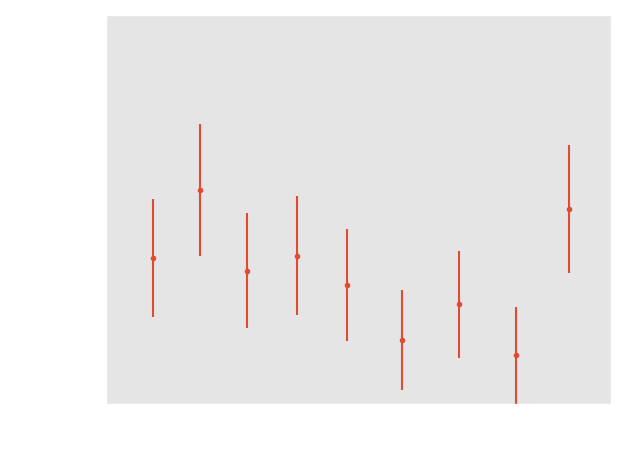

In [5]:
#plot the data
sherpa.clean()
#load data
sherpa.load_data(1, 'leg_1.pha')


## Set plot options
sherpa.set_xlinear()
sherpa.set_ylinear()


#convert to wavelength on x axis
sherpa.set_analysis('wave')

#wavelength cutoffs wavelength
sherpa.ignore(0.0, 5.0)
sherpa.ignore(160.0, None)

#use 'rate' to make y axis counts/s
# use 'count' to make y axis counts 
sherpa.set_analysis(1, 'wave', 'rate')


#bin the data into 20 bins
nbins = 100
sherpa.group_counts(nbins)

#plot data
sherpa.plot_data(1)

plt.ylabel('Counts $s^{-1} \AA^{-1}$', font='times', fontsize=14, color='white') 
plt.xlabel('Wavelength $\AA$', font='times', fontsize=14, color='white') 
plt.tick_params(colors='white', which='both')
plt.grid(False)
plt.title('')
plt.xlim(21,30)
plt.ylim(0.002,0.004)
plt.tight_layout()

plt.savefig('/Users/brigettevazquez/Downloads/NGC3227/XSpec_fits/regular_spectra', dpi=200, transparent = True)

statistical errors were found in file 'leg_1.pha' 
but not used; to use them, re-read with use_errors=True
read ARF file leg_1.arf
read RMF file leg_1.rmf
read background_up into a dataset from file leg_1.pha
read background_down into a dataset from file leg_1.pha
dataset 1: 1:205.8 -> 5:205.8 Wavelength (Angstrom)
dataset 1: 5:205.8 -> 5:160 Wavelength (Angstrom)
Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 8885.69
Final fit statistic   = 7883.63 at function evaluation 235
Data points           = 178
Degrees of freedom    = 173
Probability [Q-value] = 0
Reduced statistic     = 45.5701
Change in statistic   = 1002.07
   diskbb.norm    528.122      +/- 0           
   powerlaw.norm   1.12467e-07  +/- 2.38777e-09 
   compbb.kT      0.0241486    +/- 0.000150366 
   compbb.tau     10           +/- 0           
   compbb.norm    1.93333e+09  +/- 0           


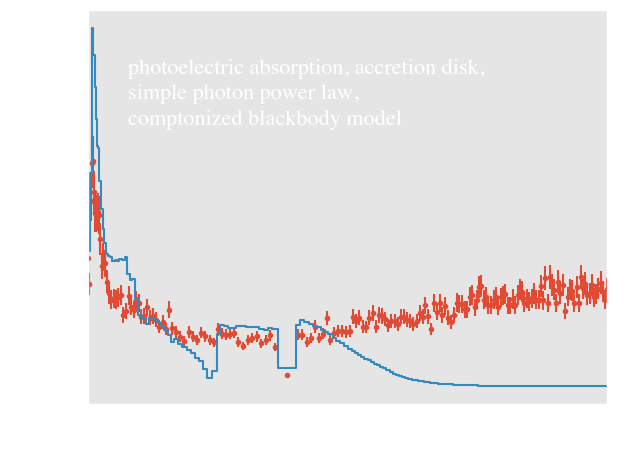

In [7]:
#CREATING FIGURE 1
#plot the data
sherpa.clean()
#load data
sherpa.load_data(1, 'leg_1.pha')


## Set plot options
sherpa.set_xlinear()
sherpa.set_ylinear()


#convert to wavelength on x axis
sherpa.set_analysis('wave')

#wavelength cutoffs wavelength
sherpa.ignore(0.0, 5.0)
sherpa.ignore(160.0, None)

#use 'rate' to make y axis counts/s
# use 'count' to make y axis counts 
sherpa.set_analysis(1, 'wave', 'rate')


#bin the data into 20 bins
nbins = 100
sherpa.group_counts(nbins)

#plot data
sherpa.plot_data(1)

#set up model

# Define the models
phabs = sherpa.xsphabs.phabs
powerlaw = xspec.XSpowerlaw('powerlaw')
compbb = xspec.XScompbb('compbb')
diskbb = xspec.XSdiskbb(name='diskbb')

# Define the composite model
model = phabs * (diskbb + powerlaw + compbb) # + refsch)

# Set the model
sherpa.set_model(model)

#list initial parameter values
phabs_nH = 1.86e-02
diskbb_Tin = 0.186874
diskbb_norm = 300
powerlaw_PhoIndex = 9.5
powerlaw_norm = 8.20947E-08
compbb_kT = 1.26014E-02
compbb_kTe = 150
compbb_tau = 0.219442
compbb_norm = 3.93634E+08

# set model parameters
phabs.nH = phabs_nH
diskbb.Tin = diskbb_Tin
diskbb.norm = diskbb_norm
powerlaw.PhoIndex = powerlaw_PhoIndex
powerlaw.norm = powerlaw_norm
compbb.kT = compbb_kT
compbb.kTe = compbb_kTe
compbb.tau = compbb_tau
compbb.norm = compbb_norm

# #freeze parameters
sherpa.freeze(phabs.nH, diskbb.Tin, powerlaw.PhoIndex, compbb.kTe)

# #you should thaw what you want to fit with the line below
# # sherpa.thaw(refsch.norm)

#fit model
sherpa.fit(1)

# Plot the model fit
sherpa.plot_fit(1)
plt.ylabel('Counts $s^{-1} \AA^{-1}$', font='times', fontsize=14, color='white') 
plt.xlabel('Wavelength $\AA$', font='times', fontsize=14, color='white') 
plt.tick_params(colors='white', which='both')
plt.title('')
plt.xlim(5,160)
plt.text(17,0.0123, 'photoelectric absorption, accretion disk,', font='times', fontsize=16, color='white')  
plt.text(17,0.0113, 'simple photon power law,', font='times', fontsize=16, color='white') 
plt.text(17,0.0103, 'comptonized blackbody model', font='times', fontsize=16, color='white') 
plt.grid(False)
plt.tight_layout() 

plt.savefig('/Users/brigettevazquez/Downloads/NGC3227/XSpec_fits/phabs_no_reflection.png', dpi=200, transparent=True)

statistical errors were found in file 'leg_1.pha' 
but not used; to use them, re-read with use_errors=True
read ARF file leg_1.arf
read RMF file leg_1.rmf
read background_up into a dataset from file leg_1.pha
read background_down into a dataset from file leg_1.pha
dataset 1: 1:205.8 -> 5:205.8 Wavelength (Angstrom)
dataset 1: 5:205.8 -> 5:160 Wavelength (Angstrom)
Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 1.2713e+08
Final fit statistic   = 8319.8 at function evaluation 375
Data points           = 178
Degrees of freedom    = 168
Probability [Q-value] = 0
Reduced statistic     = 49.5226
Change in statistic   = 1.27121e+08
   diskbb.norm    0            +/- 0           
   powerlaw.norm   9.1539e-08   +/- 2.50689e-09 
   compbb.kT      0.0001       +/- 0           
   compbb.tau     10           +/- 0           
   compbb.norm    2.87613e+11  +/- 0           
   refsch.PhoIndex   2.172        +/- 0           
   re

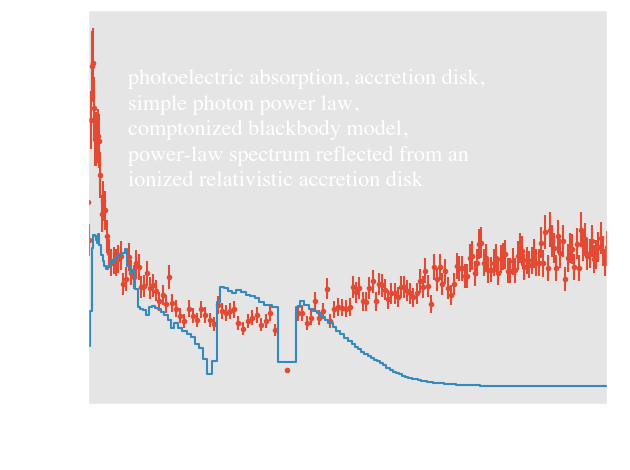

In [9]:
#CREATING FIGURE 2 with the reflection coefficient
#plot the data
sherpa.clean()
#load data
sherpa.load_data(1, 'leg_1.pha')


## Set plot options
sherpa.set_xlinear()
sherpa.set_ylinear()


#convert to wavelength on x axis
sherpa.set_analysis('wave')

#wavelength cutoffs wavelength
sherpa.ignore(0.0, 5.0)
sherpa.ignore(160.0, None)

#use 'rate' to make y axis counts/s
# use 'count' to make y axis counts 
sherpa.set_analysis(1, 'wave', 'rate')


#bin the data into 20 bins
nbins = 100
sherpa.group_counts(nbins)

#plot data
sherpa.plot_data(1)

#set up model

# Define the models
phabs = sherpa.xsphabs.phabs
powerlaw = xspec.XSpowerlaw('powerlaw')
compbb = xspec.XScompbb('compbb')
diskbb = xspec.XSdiskbb(name='diskbb')
refsch = xspec.XSrefsch('refsch')

# Define the composite model
model = phabs * (diskbb + powerlaw + compbb + refsch)

# Set the model
sherpa.set_model(model)

#list initial parameter values
phabs_nH = 1.86e-02
diskbb_Tin = 0.186874
diskbb_norm = 300
powerlaw_PhoIndex = 9.5
powerlaw_norm = 8.20947E-08
compbb_kT = 1.26014E-02
compbb_kTe = 150
compbb_tau = 0.219442
compbb_norm = 3.93634E+08
refsch_PhoIndex = 0.779614
refsch_foldE = 1
refsch_rel_refl = 5.90677E-08
refsch_z= 3.859E-03
refsch_abund = 0.5
refsch_Fe_abund = 0.5
refsch_Incl = 60.0000
refsch_T_disk = 3.00000E+04
refsch_xi = 3.55160E-03
refsch_Betor10 = 1
refsch_Rin = 24
refsch_Rout = 1000
refsch_accuracy = 2106.40
refsch_norm = 1

# set model parameters
phabs.nH = phabs_nH
diskbb.Tin = diskbb_Tin
diskbb.norm = diskbb_norm
powerlaw.PhoIndex = powerlaw_PhoIndex
powerlaw.norm = powerlaw_norm
compbb.kT = compbb_kT
compbb.kTe = compbb_kTe
compbb.tau = compbb_tau
compbb.norm = compbb_norm
refsch.PhoIndex = refsch_PhoIndex
refsch.foldE = refsch_foldE
refsch.rel_refl = refsch_rel_refl
refsch.Redshift = refsch_z
refsch.abund = refsch_abund
refsch.Fe_abund = refsch_Fe_abund
refsch.Incl = refsch_Incl
refsch.T_disk = refsch_T_disk
refsch.xi = refsch_xi
refsch.Betor10 = refsch_Betor10
refsch.Rin = refsch_Rin
refsch.Rout = refsch_Rout
refsch.accuracy = refsch_accuracy
refsch.norm = refsch_norm

# #freeze parameters
sherpa.freeze(phabs.nH, diskbb.Tin, powerlaw.PhoIndex, compbb.kTe, refsch.Redshift, refsch.Incl, refsch.Rin, refsch.Rout)

# #you should thaw what you want to fit with the line below
# # sherpa.thaw(refsch.norm)

#fit model
sherpa.fit(1)

# Plot the model fit
sherpa.plot_fit(1)
plt.ylabel('Counts $s^{-1} \AA^{-1}$', font='times', fontsize=14, color='white') 
plt.xlabel('Wavelength $\AA$', font='times', fontsize=14, color='white') 
plt.tick_params(colors='white', which='both')
plt.title('')
plt.xlim(5,160)
plt.text(17,0.0083, 'photoelectric absorption, accretion disk,', font='times', fontsize=16, color='white') 
plt.text(17,0.0076, 'simple photon power law,', font='times', fontsize=16, color='white') 
plt.text(17,0.0069, 'comptonized blackbody model,', font='times', fontsize=16, color='white') 
plt.text(17,0.0062, 'power-law spectrum reflected from an', font='times', fontsize=16, color='white') 
plt.text(17,0.0055, 'ionized relativistic accretion disk', font='times', fontsize=16, color='white') 
plt.grid(False)
plt.tight_layout()

plt.savefig('/Users/brigettevazquez/Downloads/NGC3227/XSpec_fits/phabs_with_reflection.png', dpi=200, transparent=True)

statistical errors were found in file 'leg_1.pha' 
but not used; to use them, re-read with use_errors=True
read ARF file leg_1.arf
read RMF file leg_1.rmf
read background_up into a dataset from file leg_1.pha
read background_down into a dataset from file leg_1.pha
dataset 1: 1:205.8 -> 5:205.8 Wavelength (Angstrom)
dataset 1: 5:205.8 -> 5:160 Wavelength (Angstrom)
Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 10192
Final fit statistic   = 7901.16 at function evaluation 257
Data points           = 178
Degrees of freedom    = 174
Probability [Q-value] = 0
Reduced statistic     = 45.409
Change in statistic   = 2290.83
   powerlaw.PhoIndex   1.92391      +/- 0           
   powerlaw.norm   0.00460637   +/- 7.6933e-05  
   powerlaw.PhoIndex   10           +/- 0           
   powerlaw.norm   4.73682e-08  +/- 1.02912e-09 


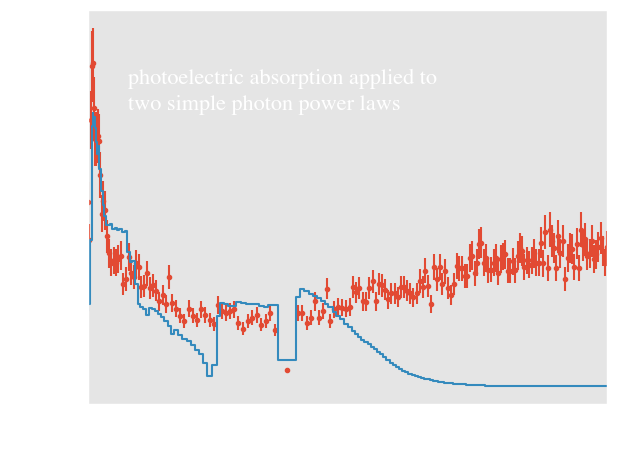

In [10]:
# #
# from sherpa.astro import xspec as xspec
# from sherpa.astro import ui as sherpa


#plot the data
sherpa.clean()
#load data
sherpa.load_data(1, 'leg_1.pha')


## Set plot options
sherpa.set_xlinear()
sherpa.set_ylinear()


#convert to wavelength on x axis
sherpa.set_analysis('wave')

#wavelength cutoffs wavelength
sherpa.ignore(0.0, 5.0)
sherpa.ignore(160.0, None)

#use 'rate' to make y axis counts/s
# use 'count' to make y axis counts 
sherpa.set_analysis(1, 'wave', 'rate')


#bin the data into 20 bins
nbins = 100
sherpa.group_counts(nbins)

#plot data
sherpa.plot_data(1)

#set up model

# Define the models
phabs = sherpa.xsphabs.phabs
powerlaw = xspec.XSpowerlaw('powerlaw')
powerlaw2 = xspec.XSpowerlaw('powerlaw')


# Define the composite model
model = phabs * (powerlaw + powerlaw2)

# Set the model
sherpa.set_model(model)

#list initial parameter values
phabs_nH = 1.86e-02
powerlaw_PhoIndex = 1.85959
powerlaw_norm = 3.70000E-03
powerlaw2_PhoIndex = 5.19487
powerlaw2_norm = 1.05816E-05

# set model parameters
phabs.nH = phabs_nH
powerlaw.PhoIndex = powerlaw_PhoIndex
powerlaw.norm = powerlaw_norm
powerlaw2.PhoIndex = powerlaw2_PhoIndex
powerlaw2.norm = powerlaw2_norm

# #freeze parameters
sherpa.freeze(phabs.nH)

# #you should thaw what you want to fit with the line below
# # sherpa.thaw(refsch.norm)

#fit model
sherpa.fit(1)

# Plot the model fit
sherpa.plot_fit(1)
plt.ylabel('Counts $s^{-1} \AA^{-1}$', font='times', fontsize=14, color='white') 
plt.xlabel('Wavelength $\AA$', font='times', fontsize=14, color='white') 
plt.tick_params(colors='white', which='both')
plt.title('')
plt.text(17,0.0083, 'photoelectric absorption applied to', font='times', fontsize=16, color='white') 
plt.text(17,0.0076, 'two simple photon power laws', font='times', fontsize=16, color='white') 
plt.xlim(5,160)
plt.grid(False)
plt.tight_layout()

plt.savefig('/Users/brigettevazquez/Downloads/NGC3227/XSpec_fits/phabs_powerlaw1.png', dpi=200, transparent=True)

statistical errors were found in file 'leg_1.pha' 
but not used; to use them, re-read with use_errors=True
read ARF file leg_1.arf
read RMF file leg_1.rmf
read background_up into a dataset from file leg_1.pha
read background_down into a dataset from file leg_1.pha
dataset 1: 1:205.8 -> 5:205.8 Wavelength (Angstrom)
dataset 1: 5:205.8 -> 5:160 Wavelength (Angstrom)
Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 1404.19
Final fit statistic   = 573.727 at function evaluation 21
Data points           = 178
Degrees of freedom    = 174
Probability [Q-value] = 3.51886e-44
Reduced statistic     = 3.29728
Change in statistic   = 830.46
   powerlaw.PhoIndex   1.98869      +/- 0.0294606   
   powerlaw.norm   0.0045658    +/- 8.34425e-05 
   powerlaw.PhoIndex   5.13824      +/- 0.0438342   
   powerlaw.norm   1.58227e-05  +/- 1.56492e-06 


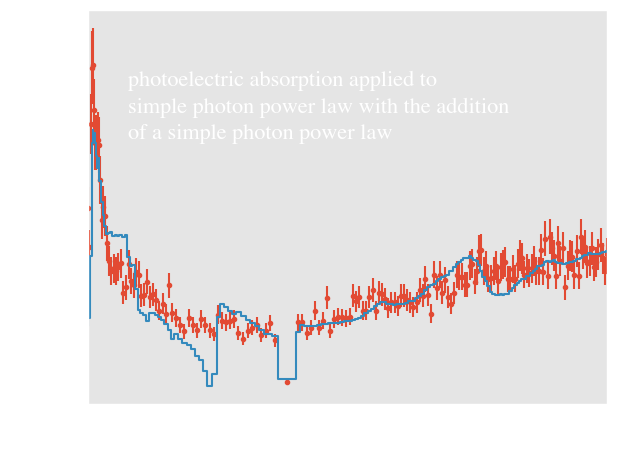

In [11]:
# #
# from sherpa.astro import xspec as xspec
# from sherpa.astro import ui as sherpa


#plot the data
sherpa.clean()
#load data
sherpa.load_data(1, 'leg_1.pha')


## Set plot options
sherpa.set_xlinear()
sherpa.set_ylinear()


#convert to wavelength on x axis
sherpa.set_analysis('wave')

#wavelength cutoffs wavelength
sherpa.ignore(0.0, 5.0)
sherpa.ignore(160.0, None)

#use 'rate' to make y axis counts/s
# use 'count' to make y axis counts 
sherpa.set_analysis(1, 'wave', 'rate')


#bin the data into 20 bins
nbins = 100
sherpa.group_counts(nbins)

#plot data
sherpa.plot_data(1)

#set up model

# Define the models
phabs = sherpa.xsphabs.phabs
powerlaw = xspec.XSpowerlaw('powerlaw')
powerlaw2 = xspec.XSpowerlaw('powerlaw')


# Define the composite model
model = phabs * (powerlaw) + powerlaw2

# Set the model
sherpa.set_model(model)

#list initial parameter values
phabs_nH = 1.86e-02
powerlaw_PhoIndex = 1.85959
powerlaw_norm = 3.70000E-03
powerlaw2_PhoIndex = 5.19487
powerlaw2_norm = 1.05816E-05

# set model parameters
phabs.nH = phabs_nH
powerlaw.PhoIndex = powerlaw_PhoIndex
powerlaw.norm = powerlaw_norm
powerlaw2.PhoIndex = powerlaw2_PhoIndex
powerlaw2.norm = powerlaw2_norm

# #freeze parameters
sherpa.freeze(phabs.nH)

# #you should thaw what you want to fit with the line below
# # sherpa.thaw(refsch.norm)

#fit model
sherpa.fit(1)

# Plot the model fit
sherpa.plot_fit(1)
plt.ylabel('Counts $s^{-1} \AA^{-1}$', font='times', fontsize=14, color='white') 
plt.xlabel('Wavelength $\AA$', font='times', fontsize=14, color='white') 
plt.tick_params(colors='white', which='both')
plt.title('')
plt.text(17,0.0083, 'photoelectric absorption applied to', font='times', fontsize=16, color='white') 
plt.text(17,0.0076, 'simple photon power law with the addition', font='times', fontsize=16, color='white') 
plt.text(17,0.0069, 'of a simple photon power law', font='times', fontsize=16, color='white') 
plt.xlim(5,160)
plt.grid(False)
plt.tight_layout()

plt.savefig('/Users/brigettevazquez/Downloads/NGC3227/XSpec_fits/phabs_powerlaw2.png', dpi=200, transparent=True)